In [1]:
import os
os.chdir("..")
os.chdir("../src")
from tool_preprocess_onehot import state_df_zip, convert_to_str






os.chdir("../data")
import pandas as pd
df = pd.read_csv("quejas-clientes-limpio.csv", low_memory=False)

c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2]:
df

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,dias de retraso,weekday
0,1291006,Debt collection,Unknown or not specified,Communication tactics,Frequent or repeated calls,TX,76119,2015-03-19,2015-03-19,"Premium Asset Services, LLC",In progress,Yes,Unknown or not specified,0 days,Thursday
1,1290580,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,TX,77479,2015-03-19,2015-03-19,Accounts Receivable Consultants Inc.,Closed with explanation,Yes,Unknown or not specified,0 days,Thursday
2,1290564,Mortgage,FHA mortgage,"Application, originator, mortgage broker",Unknown or not specified,MA,2127,2015-03-19,2015-03-19,RBS Citizens,Closed with explanation,Yes,Yes,0 days,Thursday
3,1291615,Credit card,Unknown or not specified,Other,Unknown or not specified,CA,92592,2015-03-19,2015-03-19,Navy FCU,In progress,Yes,Unknown or not specified,0 days,Thursday
4,1292165,Debt collection,Non-federal student loan,Cont'd attempts collect debt not owed,Debt resulted from identity theft,OH,43068,2015-03-19,2015-03-19,Transworld Systems Inc.,In progress,Yes,Unknown or not specified,0 days,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28151,1178184,Debt collection,Unknown or not specified,Cont'd attempts collect debt not owed,Debt is not mine,TX,75201,2015-01-01,2015-01-01,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No,0 days,Thursday
28152,1178183,Consumer loan,Vehicle loan,Taking out the loan or lease,Unknown or not specified,GA,30043,2015-01-01,2015-01-01,DriveTime,Closed with explanation,Yes,Unknown or not specified,0 days,Thursday
28153,1178182,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Unknown or not specified,MN,55105,2015-01-01,2015-01-01,Regions,Closed with non-monetary relief,Yes,No,0 days,Thursday
28154,1178181,Payday loan,Unknown or not specified,Can't stop charges to bank account,Unknown or not specified,CA,92509,2015-01-01,2015-01-01,Moneytree Inc,Closed with explanation,Yes,Unknown or not specified,0 days,Thursday


In [3]:
df.fillna("Unknown or not specified", inplace=True)

In [4]:
df["Consumer disputed?"].unique()

array(['Unknown or not specified', 'Yes', 'No'], dtype=object)

In [5]:
df=df.drop(columns=["Company", "Date received",	"Date sent to company" ,"dias de retraso" ])
df=df[df["Company response"]!="In progress"]
df=df[df["Consumer disputed?"]!="Unknown or not specified"]

In [6]:
df.drop(columns=["Complaint ID", "ZIP code"], inplace=True)
df

,Product,Sub-product,Issue,Sub-issue,State,Company response,Timely response?,Consumer disputed?,weekday
2,Mortgage,FHA mortgage,"Application, originator, mortgage broker",Unknown or not specified,MA,Closed with explanation,Yes,Yes,Thursday
6,Consumer loan,Installment loan,Managing the loan or lease,Unknown or not specified,OH,Closed with explanation,Yes,Yes,Wednesday
9,Debt collection,Payday loan,Taking/threatening an illegal action,Threatened arrest/jail if do not pay,TX,Closed with explanation,Yes,Yes,Wednesday
14,Debt collection,"Other (phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,UT,Closed with non-monetary relief,Yes,Yes,Wednesday
22,Debt collection,Unknown or not specified,Improper contact or sharing of info,Contacted me after I asked not to,IL,Closed with explanation,Yes,Yes,Wednesday
...,...,...,...,...,...,...,...,...,...
28149,Credit reporting,Unknown or not specified,Improper use of my credit report,Report improperly shared by CRC,MI,Closed with explanation,Yes,No,Thursday
28150,Credit card,Unknown or not specified,Late fee,Unknown or not specified,AR,Closed with monetary relief,Yes,No,Thursday
28151,Debt collection,Unknown or not specified,Cont'd attempts collect debt not owed,Debt is not mine,TX,Closed with non-monetary relief,Yes,No,Thursday
28153,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Unknown or not specified,MN,Closed with non-monetary relief,Yes,No,Thursday


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6006 entries, 2 to 28155
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product             6006 non-null   object
 1   Sub-product         6006 non-null   object
 2   Issue               6006 non-null   object
 3   Sub-issue           6006 non-null   object
 4   State               6006 non-null   object
 5   Company response    6006 non-null   object
 6   Timely response?    6006 non-null   object
 7   Consumer disputed?  6006 non-null   object
 8   weekday             6006 non-null   object
dtypes: object(9)
memory usage: 469.2+ KB


In [8]:
X=df.drop(columns=["Consumer disputed?"])

In [9]:
X["Timely response?"]=X["Timely response?"].replace("Yes", 1).replace("No", 0)

C:\Users\unaif\AppData\Local\Temp\ipykernel_25448\1871740596.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["Timely response?"]=X["Timely response?"].replace("Yes", 1).replace("No", 0)


In [10]:
y=df["Consumer disputed?"]

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6006 entries, 2 to 28155
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product           6006 non-null   object
 1   Sub-product       6006 non-null   object
 2   Issue             6006 non-null   object
 3   Sub-issue         6006 non-null   object
 4   State             6006 non-null   object
 5   Company response  6006 non-null   object
 6   Timely response?  6006 non-null   int64 
 7   weekday           6006 non-null   object
dtypes: int64(1), object(7)
memory usage: 422.3+ KB


In [12]:
categorical_cols=(X.select_dtypes(include=['object', 'category']).columns.tolist())

categorical_cols

['Product',
 'Sub-product',
 'Issue',
 'Sub-issue',
 'State',
 'Company response',
 'weekday']

In [13]:
categorical_cols

['Product',
 'Sub-product',
 'Issue',
 'Sub-issue',
 'State',
 'Company response',
 'weekday']

In [14]:
numeric_cols=["Timely response?"]


In [15]:
import optuna
from optuna import Trial

from optuna.distributions import IntDistribution, CategoricalDistribution, FloatDistribution

param_distributions = {
    "xgbclassifier__n_estimators": IntDistribution(50, 500),
    "xgbclassifier__max_depth": IntDistribution(3, 15),
    "xgbclassifier__learning_rate": FloatDistribution(0.01, 0.4),
    "xgbclassifier__subsample": FloatDistribution(0.2, 1.0),
    "xgbclassifier__colsample_bytree": FloatDistribution(0.5, 1.0),
    "xgbclassifier__gamma": FloatDistribution(0, 5),
    "xgbclassifier__min_child_weight": IntDistribution(1, 10),
    "xgbclassifier__reg_alpha": FloatDistribution(0, 1),   # L1 regularization
    "xgbclassifier__reg_lambda": FloatDistribution(0, 1),  # L2 regularization
    "xgbclassifier__scale_pos_weight": FloatDistribution(1, 10),  # Para clases desbalanceadas
    "xgbclassifier__use_label_encoder": CategoricalDistribution([False]),  # recomendado para evitar warning
    # No se suele tune el random_state, se fija para reproducibilidad
}

c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
numeric_cols

['Timely response?']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, OrdinalEncoder 
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier

# Identify feature types
"""categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
"""



# Numeric preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical preprocessing with type conversion fix


categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # opcional
    ('encoder', OneHotEncoder())
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)
model=XGBClassifier(random_state=42)

# Complete pipeline with ADASYN
model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversampler', ADASYN(random_state=42)),
    ('xgbclassifier', model)
])

# Train the pipeline

In [18]:
trained_preprocessor = model_pipeline.named_steps['preprocessor']


In [19]:
y.replace(to_replace="Yes", value=1, inplace=True)

y.replace(to_replace="No", value=0, inplace=True)

C:\Users\unaif\AppData\Local\Temp\ipykernel_25448\1368385419.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace(to_replace="No", value=0, inplace=True)


In [20]:
y

2        1
6        1
9        1
14       1
22       1
        ..
28149    0
28150    0
28151    0
28153    0
28155    1
Name: Consumer disputed?, Length: 6006, dtype: int64

In [21]:
y.value_counts()

Consumer disputed?
1    4708
0    1298
Name: count, dtype: int64

In [22]:
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Timely response?']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Product',...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=True, shuffle=True)

In [24]:
from sklearn.model_selection import StratifiedKFold
from optuna.integration import OptunaSearchCV

optuna_search = OptunaSearchCV(
    estimator=model_pipeline,
    param_distributions=param_distributions,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1_macro',
    n_trials=150,  # Number of trials/studies
    timeout=None,  # Or set a time limit (in seconds)
    n_jobs=-1,
    verbose=2,
    random_state=42
)

optuna_search.fit(X_train, y_train)

C:\Users\unaif\AppData\Local\Temp\ipykernel_25448\1212715459.py:4: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = OptunaSearchCV(
[I 2025-08-07 14:45:34,852] A new study created in memory with name: no-name-45133ec5-40b4-4a94-9dec-77811c0cec91
[I 2025-08-07 14:45:37,131] Trial 12 finished with value: 0.43937443704230955 and parameters: {'xgbclassifier__n_estimators': 81, 'xgbclassifier__max_depth': 5, 'xgbclassifier__learning_rate': 0.10960131648528061, 'xgbclassifier__subsample': 0.786561231785962, 'xgbclassifier__colsample_bytree': 0.633211227162507, 'xgbclassifier__gamma': 4.016201261998847, 'xgbclassifier__min_child_weight': 10, 'xgbclassifier__reg_alpha': 0.5843975549747211, 'xgbclassifier__reg_lambda': 0.33282077788054765, 'xgbclassifier__scale_pos_weight': 6.1072972681249595, 'xgbclassifier__use_label_encoder': False}. Best is trial 12 with value: 0.43937443704230955.
[I 2025-08-07 14:45:37,

OptunaSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
               estimator=Pipeline(steps=[('preprocessor',
                                          ColumnTransformer(transformers=[('num',
                                                                           Pipeline(steps=[('imputer',
                                                                                            SimpleImputer()),
                                                                                           ('scaler',
                                                                                            StandardScaler())]),
                                                                           ['Timely '
                                                                            'response?']),
                                                                          ('cat',
                                                                           Pipeline(steps=[('imputer',
                                                                                            SimpleImputer(fill_value='missing',
                                                                                                          strategy='constant')),
                                                                                           ('enco...
                                    'xgbclassifier__reg_lambda': FloatDistribution(high=1.0, log=False, low=0.0, step=None),
                                    'xgbclassifier__scale_pos_weight': FloatDistribution(high=10.0, log=False, low=1.0, step=None),
                                    'xgbclassifier__subsample': FloatDistribution(high=1.0, log=False, low=0.2, step=None),
                                    'xgbclassifier__use_label_encoder': CategoricalDistribution(choices=(False,))},
               random_state=42, scoring='f1_macro', verbose=2)

In [25]:
df[df.apply(lambda row: row.astype(str).str.contains('Savings account', case=False, na=False)).any(axis=1)]

,Product,Sub-product,Issue,Sub-issue,State,Company response,Timely response?,Consumer disputed?,weekday
1580,Bank account or service,Savings account,Deposits and withdrawals,Unknown or not specified,CA,Closed with explanation,Yes,1,Thursday
4744,Bank account or service,Savings account,"Account opening, closing, or management",Unknown or not specified,CO,Closed with explanation,Yes,1,Wednesday
6890,Bank account or service,Savings account,Deposits and withdrawals,Unknown or not specified,GA,Closed with explanation,Yes,1,Friday
7651,Bank account or service,Savings account,"Account opening, closing, or management",Unknown or not specified,FL,Closed with explanation,Yes,1,Wednesday
8590,Bank account or service,Savings account,"Account opening, closing, or management",Unknown or not specified,FL,Closed with explanation,Yes,1,Tuesday
9119,Bank account or service,Savings account,"Account opening, closing, or management",Unknown or not specified,AZ,Closed with explanation,Yes,1,Sunday
9208,Bank account or service,Savings account,"Account opening, closing, or management",Unknown or not specified,FL,Closed with monetary relief,Yes,1,Sunday
9544,Bank account or service,Savings account,"Account opening, closing, or management",Unknown or not specified,NC,Closed with monetary relief,Yes,1,Friday
9729,Bank account or service,Savings account,Deposits and withdrawals,Unknown or not specified,MD,Closed with non-monetary relief,Yes,1,Friday
10610,Bank account or service,Savings account,"Account opening, closing, or management",Unknown or not specified,PA,Closed with explanation,Yes,1,Wednesday


In [26]:
model_pipeline.set_params(**optuna_search.best_params_)
model_pipeline.fit(X_train, y_train)


c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:47:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Timely response?']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Product',...
                               gamma=1.496238075768614, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.19309655692557645, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=15,
                               max_leaves=None, min_child_weight=5, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=391, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [27]:
y_probs = pd.DataFrame(model_pipeline.predict_proba(X_test)[:, 1])
y_probs

,0
0,0.951864
1,0.482782
2,0.696972
3,0.421151
4,0.404996
...,...
1197,0.350262
1198,0.683864
1199,0.878067
1200,0.883296


In [28]:
y_pred = (y_probs[0] > 0.526).astype(int)
y_pred


0       1
1       0
2       1
3       0
4       0
       ..
1197    0
1198    1
1199    1
1200    1
1201    1
Name: 0, Length: 1202, dtype: int64

In [29]:
y_pred.value_counts()

0
1    1041
0     161
Name: count, dtype: int64

In [30]:


y_test=pd.DataFrame(y_test).replace(to_replace=["Yes", "No"], value=[1, 0] )


Accuracy: 0.7512479201331115
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.23      0.29       260
           1       0.81      0.89      0.85       942

    accuracy                           0.75      1202
   macro avg       0.59      0.56      0.57      1202
weighted avg       0.72      0.75      0.73      1202

Confusion Matrix:


<Axes: >

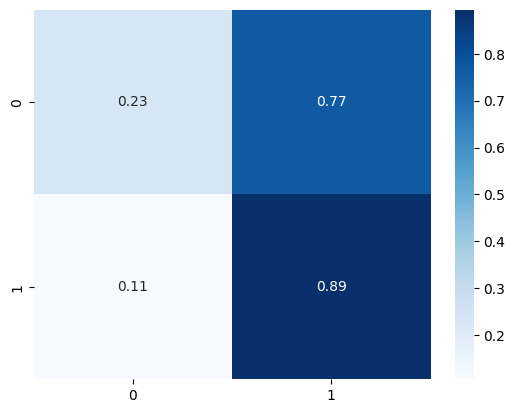

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from seaborn import heatmap
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
(heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, fmt=".2f", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1]))


In [32]:
from sklearn.metrics import f1_score

# Crear lista de tuplas (threshold, f1_score)
thresholds = [i/100 for i in range(0, 100)]
f1_scores = [(t, f1_score(y_test, (y_probs[0] > t).astype(int))) for t in thresholds]

# Elegir el threshold con mejor F1
best_threshold, best_f1 = max(f1_scores, key=lambda x: x[1])

print(f"Mejor umbral (threshold) para F1: {best_threshold}")
print(f"Mejor F1 obtenido: {best_f1}")

Mejor umbral (threshold) para F1: 0.21
Mejor F1 obtenido: 0.8801128349788434


In [33]:
from sklearn.model_selection import cross_validate
cross_val=cross_validate(model_pipeline, X_train, y_train, cv=10)["test_score"]

print(cross_val.mean())
print(cross_val.std())

c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:47:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:47:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:47:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:47:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters:

0.7581232674982675
0.011810639835513195


In [34]:
import os 
import pickle
os.chdir("../models")

"""with open('modelo_pipe_dispute_randomforest.pkl', 'wb') as f:
    pickle.dump(model_pipeline, f)"""

"with open('modelo_pipe_dispute_randomforest.pkl', 'wb') as f:\n    pickle.dump(model_pipeline, f)"

In [ ]:
import dill
with open("modelo_pipe_dispute_xbclass_onehot.pkl", "wb") as f:
    dill.dump(model_pipeline, f)

In [36]:
trained_preprocessor.transform(X)

array([[ 0.09046922,  6.        ,  9.        , ..., 21.        ,
         1.        ,  4.        ],
       [ 0.09046922,  1.        , 16.        , ..., 37.        ,
         1.        ,  6.        ],
       [ 0.09046922,  4.        , 26.        , ..., 47.        ,
         1.        ,  6.        ],
       ...,
       [ 0.09046922,  4.        , 32.        , ..., 47.        ,
         3.        ,  4.        ],
       [ 0.09046922,  6.        ,  6.        , ..., 25.        ,
         3.        ,  4.        ],
       [ 0.09046922,  5.        ,  8.        , ..., 37.        ,
         1.        ,  4.        ]])

In [37]:
dense_array = trained_preprocessor.transform(X).toarray()  # convert sparse to dense

# Create DataFrame
df = pd.DataFrame(trained_preprocessor.transform(X))

print(df.shape)
print(df.head())

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [ ]:
import pandas as pd

df_sparse = pd.DataFrame.sparse.from_spmatrix(trained_preprocessor.transform(X))
print(df_sparse.shape)
print(df_sparse.head())


(6006, 1215)
   0     1     2     3     4     5     6     7     8     9     ...  1205  \
0     0     0     0     0     0     0   1.0     0     0     0  ...     0   
1     0   1.0     0     0     0     0     0     0     0     0  ...     0   
2     0     0     0     0   1.0     0     0     0     0     0  ...     0   
3     0     0     0     0   1.0     0     0     0     0     0  ...     0   
4     0     0     0     0   1.0     0     0     0     0     0  ...     0   

   1206  1207  1208  1209  1210  1211  1212  1213  1214  
0     0     0     0     0   1.0     0     0     0   1.0  
1     0     0     0     0   1.0     0     0     0   1.0  
2     0     0     0     0   1.0     0     0     0   1.0  
3     0     0     0     0     0     0   1.0     0   1.0  
4     0     0     0     0   1.0     0     0     0   1.0  

[5 rows x 1215 columns]


In [ ]:
df_sparse


,0,1,2,3,4,5,6,7,8,9,...,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214
0,0,0,0,0,0,0,1.0,0,0,0,...,0,0,0,0,0,1.0,0,0,0,1.0
1,0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1.0,0,0,0,1.0
2,0,0,0,0,1.0,0,0,0,0,0,...,0,0,0,0,0,1.0,0,0,0,1.0
3,0,0,0,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0,1.0
4,0,0,0,0,1.0,0,0,0,0,0,...,0,0,0,0,0,1.0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6001,0,0,0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,1.0,0,0,0,1.0
6002,0,0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.0,0,0,1.0
6003,0,0,0,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0,1.0
6004,0,0,0,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,1.0,0,1.0
